In [1]:
import pandas as pd

In [2]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]

In [3]:
petersburg=pd.DataFrame(data=petersburg, columns=['Petersburg'])
petersburg

,Petersburg
0,0.0974
1,0.1352
2,0.0817
3,0.1016
4,0.0968
5,0.1064
6,0.1050


In [4]:
magadan=pd.DataFrame(data=magadan, columns=['Magadan'])
magadan

,Magadan
0,0.1033
1,0.0915
2,0.0781
3,0.0685
4,0.0677
5,0.0697
6,0.0764
7,0.0689


In [5]:
df=petersburg.join(magadan) # обединение в один датафрейм
df

,Petersburg,Magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764


Перед тестом на корреляцию сначала рассмотрим, какое распределение у данных, выдвинем гипотезы, а затем проведем сам тест

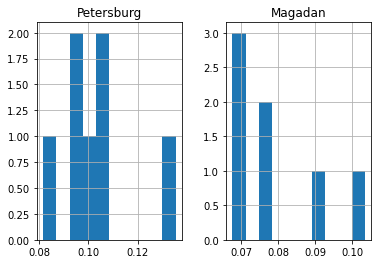

In [6]:
df.hist(); 

**Вывод:** данные распределены ненормально, поэтому проверять нулевую гипотезу будем на тесте на корреляцию Спирмена

Нулевая гипотеза: зависимость между размерами раковин мидий, выращенных в Санкт-Петербурге и Магадане, отсутствует

Альтернативная гипотеза: размеры раковин мидий, выращенных в Санкт-Петербурге и Магадане, зависят друг от друга

In [7]:
from scipy.stats import spearmanr #импорт необходимого модуля и метода

In [8]:
corr, p = spearmanr(df['Petersburg'], df['Magadan'])

In [9]:
alpha = 0.05 #уровень значимости

In [10]:
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.7599453002180929 > 0.05. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.


**Вывод:** Следовательно, мы принимает нулевую гипотезу - зависимости между признаками нет

### Какова разница в среднем размере мидии в зависимости от города-производителя?

Для ответа на вопрос сформируем гипотезы

Нулевая гипотеза: средние значения размера мидий Санкт-Петербурга и Магадана равны.

Альтернативная гипотеза: между средними значениями размера мидий Сантк-Петербурга и Магадана есть существенная разница.

Т.к. Зависимая переменная является количественной, а признаки из разных совокупностей, будет проводить независимый T-тест

In [11]:
from scipy.stats import ttest_ind

In [26]:
test_results = ttest_ind(df['Petersburg'], df['Magadan'])

In [27]:
p1 = round(test_results[1],2)

In [28]:
if p1>alpha:
    print(f"{p1} > {alpha}. Мы не можем отвергнуть нулевую гипотезу.")
else:
    print(f"{p1} <= {alpha}. Мы отвергаем нулевую гипотезу.")

0.01 <= 0.05. Мы отвергаем нулевую гипотезу.


**Вывод:** При уровне значимости альфа в 0.05, результат теста показал нам, что мы отвергаем нулевую гипотезу. Таким образом существует разница между средними значениями мидий из Санкт-Петербурга и Магадана.

In [30]:
df.describe()

,Petersburg,Magadan
count,7.000000,7.000000
mean,0.103443,0.079314
std,0.016209,0.013404
min,0.081700,0.067700
25%,0.097100,0.069100
50%,0.101600,0.076400
75%,0.105700,0.084800
max,0.135200,0.103300


**Вывод:** Из таблицы видно, что средний размер мидий из Санкт-Петербурга превышает средний размер мидий из Магадана на примерно 0.03.